In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Non-anticipativity

(13.099999999999998, 494.9, -5.25, 0.25)

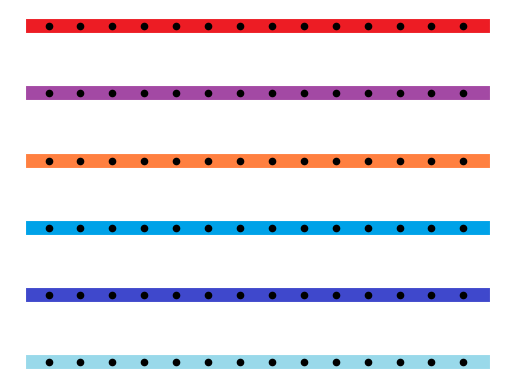

In [14]:
fig,ax = plt.subplots(1,1)

colors = np.array([
    [237,28,36],
    [163,73,164],
    [255,128,64],
    [0,162,232],
    [63,72,204],
    [153,217,234]
])

xStart = 35
xStop = 473

dx = 83 - 52

dy = 1

for i in range(colors.shape[0]):
    y = -i*dy
    ax.plot([xStart,xStop],[y,y],color=colors[i,:]/255,linewidth=10)

    xs = np.arange(xStart+dx/2,xStop,dx)
    ys = y * np.ones(len(xs))
    ax.scatter(xs,ys,color="black",zorder=10,s=20)


ax.axis(False)


# Route Planning Problem with Scenarios

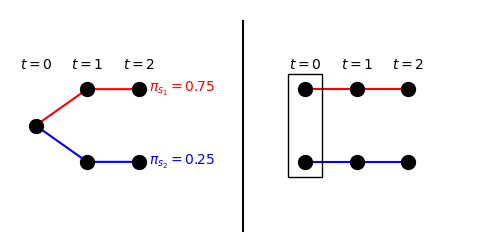

In [55]:
fig,(ax1,ax3,ax2) = plt.subplots(1,3,width_ratios=(1,0.1,1),figsize=(6,3))

y1 = np.sqrt(2)/2

for i in range(3):
    ax1.text(i,1.1,"$t="+str(i)+"$",ha="center")
    ax2.text(i,1.1,"$t="+str(i)+"$",ha="center")


ax1.scatter([0,1,1,2,2],[0,y1,-y1,y1,-y1],color="black",s=100)
ax1.plot([2,1,0],[y1,y1,0],color="red",zorder=0)
ax1.plot([2,1,0],[-y1,-y1,0],color="blue",zorder=0)

ax1.text(2.2,y1,"$\pi_{s_1} = 0.75$",va="center",color="red")
ax1.text(2.2,-y1,"$\pi_{s_2} = 0.25$",va="center",color="blue")

ax1.set_aspect('equal')
ax1.axis(False)

ax2.scatter([0,0,1,1,2,2],[y1,-y1,y1,-y1,y1,-y1],color="black",s=100)
ax2.plot([2,1,0],[y1,y1,y1],color="red",zorder=0)
ax2.plot([2,1,0],[-y1,-y1,-y1],color="blue",zorder=0)

rec = patches.Rectangle((-0.33,1),0.66,-2,facecolor="none",edgecolor="black")
ax2.add_patch(rec)

ax2.set_xlim(-0.5,3.3)
ax2.set_ylim(-1.1,1.1)

ax1.set_xlim(-0.5,3.3)
ax1.set_ylim(-1.1,1.1)

ax2.set_aspect('equal')
ax2.axis(False)

ax3.plot([0,0],[0,1],color="black")
ax3.axis(False)

fig.savefig("RoutePlanningProblemWithScenarios.png")

# Big M

In [3]:
from matplotlib.patches import Polygon

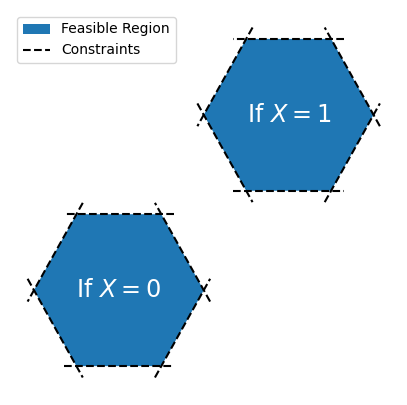

In [90]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

numSizes = 6
thetas = np.linspace(0,2*np.pi,numSizes+1)

xs = np.cos(thetas)
ys = np.sin(thetas)

points = np.vstack([xs,ys])

overFrac = 0.3

poly1 = Polygon(points.T,closed=True,label="Feasible Region")
ax.add_patch(poly1)
ax.scatter(xs,ys,s=0)

for i in range(numSizes+1):
    x1 = points[0,i-1]
    x2 = points[0,i]
    y1 = points[1,i-1]
    y2 = points[1,i]

    label = {}
    if i == 0:
        label["label"] = "Constraints"

    dx = (x2-x1)*overFrac/2
    dy = (y2-y1)*overFrac/2

    plt.plot([x1-dx,x2+dx],[y1-dy,y2+dy],'k--',**label)

points += 2
poly2 = Polygon(points.T,closed=True)
ax.add_patch(poly2)
ax.scatter(points[0,:],points[1,:],s=0)

ax.text(0,0,"If $X = 0$",color="white",ha="center",va="center",fontsize="xx-large")
ax.text(2,2,"If $X = 1$",color="white",ha="center",va="center",fontsize="xx-large")

for i in range(numSizes+1):
    x1 = points[0,i-1]
    x2 = points[0,i]
    y1 = points[1,i-1]
    y2 = points[1,i]

    dx = (x2-x1)*overFrac/2
    dy = (y2-y1)*overFrac/2

    plt.plot([x1-dx,x2+dx],[y1-dy,y2+dy],'k--')

ax.axis(False)
ax.legend()
fig.savefig("BigM.png")

# Expanded Big M

In [52]:
from matplotlib.patches import FancyArrowPatch

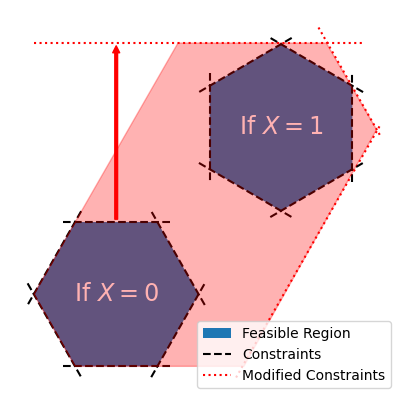

In [180]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

numSizes = 6
thetas = np.linspace(0,2*np.pi,numSizes+1)

xs = np.cos(thetas)
ys = np.sin(thetas)

points = np.vstack([xs,ys])

overFrac = 0.3

poly1 = Polygon(points.T,closed=True,label="Feasible Region")
ax.add_patch(poly1)
ax.scatter(xs,ys,s=0)

for i in range(numSizes+1):
    x1 = points[0,i-1]
    x2 = points[0,i]
    y1 = points[1,i-1]
    y2 = points[1,i]

    label = {}
    if i == 0:
        label["label"] = "Constraints"

    dx = (x2-x1)*overFrac/2
    dy = (y2-y1)*overFrac/2

    plt.plot([x1-dx,x2+dx],[y1-dy,y2+dy],'k--',**label)

M=2.1475
arrow1 = FancyArrowPatch((0,ys[1]),(0,ys[1]+M),mutation_scale=10,color="red")
ax.add_patch(arrow1)
ax.plot([-1,3],[ys[1]+M,ys[1]+M],color="red",linestyle="dotted",label="Modified Constraints")

M = 2.455
slope = (ys[1]-ys[0]) / (xs[1]-xs[0])
yTop = 3.2
xRight = 3.2
b = yTop - slope*M
ax.plot([M,xRight],[yTop,slope*xRight+b],color="red",linestyle="dotted")

M = 1.455
slope = (ys[-2]-ys[0]) / (xs[-2]-xs[0])
yTop = -1
xRight = 3.2
b = yTop - slope*M
ax.plot([M,xRight],[yTop,slope*xRight+b],color="red",linestyle="dotted")



expandedPoints = np.array([
    [xs[3],ys[3]],
    [0.75,2.1475+ys[1]],
    [2.55,2.1475+ys[1]],
    [3.16,1.975],
    [1.55,ys[-2]],
    [xs[-3],ys[-3]]
])
expandedPoly = Polygon(expandedPoints,color="red",alpha=0.3,zorder=5)
ax.add_patch(expandedPoly)






thetas = np.linspace(0,2*np.pi,numSizes+1)+np.pi/2

xs = np.cos(thetas)
ys = np.sin(thetas)

points = np.vstack([xs,ys])
points += 2
poly2 = Polygon(points.T,closed=True)
ax.add_patch(poly2)
ax.scatter(points[0,:],points[1,:],s=0)

ax.text(0,0,"If $X = 0$",color="white",ha="center",va="center",fontsize="xx-large")
ax.text(2,2,"If $X = 1$",color="white",ha="center",va="center",fontsize="xx-large")

for i in range(numSizes+1):
    x1 = points[0,i-1]
    x2 = points[0,i]
    y1 = points[1,i-1]
    y2 = points[1,i]

    dx = (x2-x1)*overFrac/2
    dy = (y2-y1)*overFrac/2

    plt.plot([x1-dx,x2+dx],[y1-dy,y2+dy],'k--')

ax.axis(False)
ax.legend()
fig.savefig(f"ExpandedBigM.png")

# Big-M Version 2

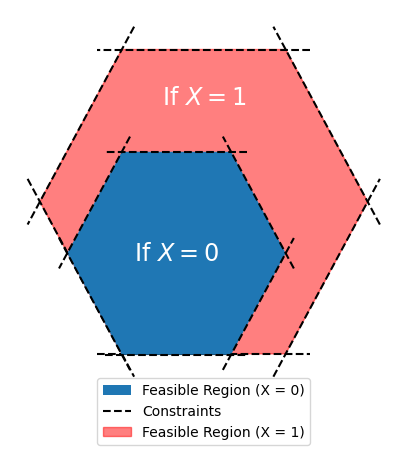

In [86]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

numSizes = 6
thetas = np.linspace(0,2*np.pi,numSizes+1)

xs = np.cos(thetas)
ys = np.sin(thetas)

points = np.vstack([xs,ys])

overFrac = 0.3

poly1 = Polygon(points.T,closed=True,label="Feasible Region (X = 0)",zorder=10)
ax.add_patch(poly1)
ax.scatter(xs,ys,s=0,zorder=10)

for i in range(numSizes+1):
    x1 = points[0,i-1]
    x2 = points[0,i]
    y1 = points[1,i-1]
    y2 = points[1,i]

    label = {}
    if i == 0:
        label["label"] = "Constraints"

    dx = (x2-x1)*overFrac/2
    dy = (y2-y1)*overFrac/2

    plt.plot([x1-dx,x2+dx],[y1-dy,y2+dy],'k--',zorder=10,**label)

points *= 1.5
points[0,:] += 0.25
points[1,:] += 0.44
poly2 = Polygon(points.T,closed=True,color="red",alpha=0.5,label="Feasible Region (X = 1)")
ax.add_patch(poly2)
ax.scatter(points[0,:],points[1,:],s=0)

ax.text(0,0,"If $X = 0$",color="white",ha="center",va="center",fontsize="xx-large",zorder=10)
ax.text(0.25,1.33,"If $X = 1$",color="white",ha="center",va="center",fontsize="xx-large",zorder=10)

for i in range(numSizes+1):
    x1 = points[0,i-1]
    x2 = points[0,i]
    y1 = points[1,i-1]
    y2 = points[1,i]

    dx = (x2-x1)*overFrac/2
    dy = (y2-y1)*overFrac/2

    plt.plot([x1-dx,x2+dx],[y1-dy,y2+dy],'k--')

ax.axis(False)
ax.legend(loc="lower center", bbox_to_anchor=(0.5,-0.15))
fig.savefig("BigM.png")

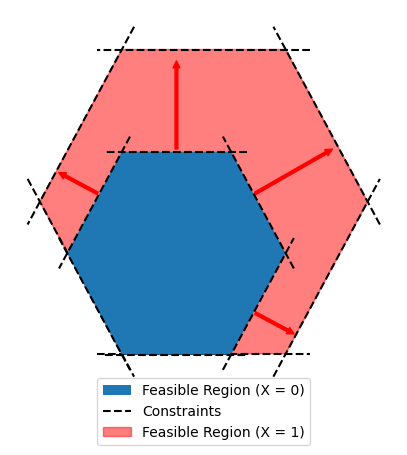

In [85]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

numSizes = 6
thetas = np.linspace(0,2*np.pi,numSizes+1)

xs = np.cos(thetas)
ys = np.sin(thetas)

points = np.vstack([xs,ys])

overFrac = 0.3

poly1 = Polygon(points.T,closed=True,label="Feasible Region (X = 0)",zorder=10)
ax.add_patch(poly1)
ax.scatter(xs,ys,s=0,zorder=10)

for i in range(numSizes+1):
    x1 = points[0,i-1]
    x2 = points[0,i]
    y1 = points[1,i-1]
    y2 = points[1,i]

    label = {}
    if i == 0:
        label["label"] = "Constraints"

    dx = (x2-x1)*overFrac/2
    dy = (y2-y1)*overFrac/2

    plt.plot([x1-dx,x2+dx],[y1-dy,y2+dy],'k--',zorder=10,**label)

points *= 1.5
points[0,:] += 0.25
points[1,:] += 0.44
poly2 = Polygon(points.T,closed=True,color="red",alpha=0.5,label="Feasible Region (X = 1)")
ax.add_patch(poly2)
ax.scatter(points[0,:],points[1,:],s=0)

for i in range(numSizes+1):
    x1 = points[0,i-1]
    x2 = points[0,i]
    y1 = points[1,i-1]
    y2 = points[1,i]

    dx = (x2-x1)*overFrac/2
    dy = (y2-y1)*overFrac/2

    plt.plot([x1-dx,x2+dx],[y1-dy,y2+dy],'k--')

M= 0.8
arrow1 = FancyArrowPatch((0,ys[1]),(0,ys[1]+M),mutation_scale=10,color="red")
ax.add_patch(arrow1)

arrow1 = FancyArrowPatch((-0.7,0.5),(-1.1,0.7),mutation_scale=10,color="red")
ax.add_patch(arrow1)
arrow1 = FancyArrowPatch((0.7,0.5),(1.45,0.9),mutation_scale=10,color="red")
ax.add_patch(arrow1)
arrow1 = FancyArrowPatch((0.7,-0.5),(1.1,-0.7),mutation_scale=10,color="red")
ax.add_patch(arrow1)

ax.axis(False)
ax.legend(loc="lower center", bbox_to_anchor=(0.5,-0.15))
fig.savefig("ExpandedBigM.png")